## Bike Sharing Case Study


#### Problem Statement:
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands


Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 



## Step 1: Reading and Understanding the Data

In [1]:
# Supress the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import Numpy and Pandas library
import numpy as np, pandas as pd

In [3]:
# Read the dataframe
shared_bike = pd.read_csv('day.csv')
shared_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
shared_bike.shape

(730, 16)

In [5]:
shared_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
shared_bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# check for null values
shared_bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
shared_bike.shape

(730, 16)

## Step 2: Data Pre-processing

In [9]:
# mapping the 'mnth' column
shared_bike['mnth'] = shared_bike['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

In [10]:
# mapping the 'season' column
shared_bike['season'] = shared_bike['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [11]:
# mapping the 'weekday' column
shared_bike['weekday'] = shared_bike['weekday'].map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [12]:
# mapping the 'weathersit' column
shared_bike['weathersit'] = shared_bike['weathersit'].map({1:'Clear', 2:'Mist', 3:'Ligt_rain_snow', 4:'Heavy_rain_snow'})

#### Drop the unwanted columns

In [13]:
shared_bike.drop(['dteday', 'instant', 'casual', 'registered'], axis=1, inplace=True)
shared_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Step 3: Visualise the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

##### Visualising the numerical variables
Lets make a pairplot of all the numerical variables

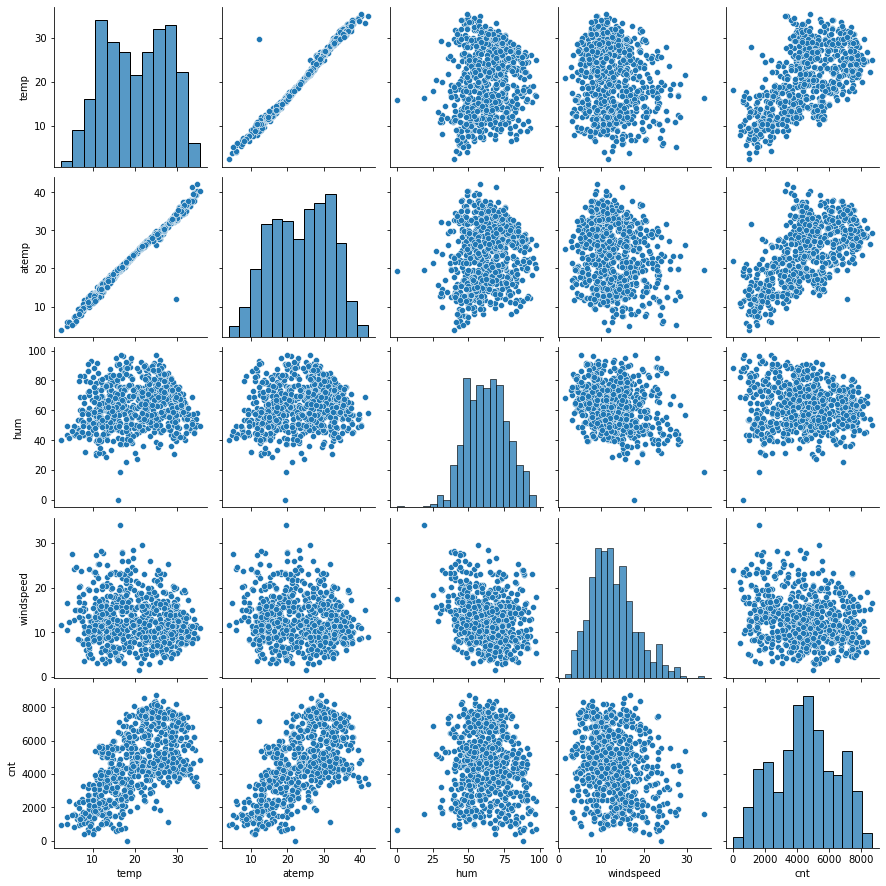

In [15]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
sns.pairplot(data = shared_bike, vars = num_vars)
plt.show()

###### Insights from numerical variables:
1. Total rental bike counts are positively correlated with 'temp' and 'atemp' variances.
2. 'temp' and 'atemp' are strongly positive correlated.
3. humidity and windspeed variables are randomly distributed against the target variable ('cnt').

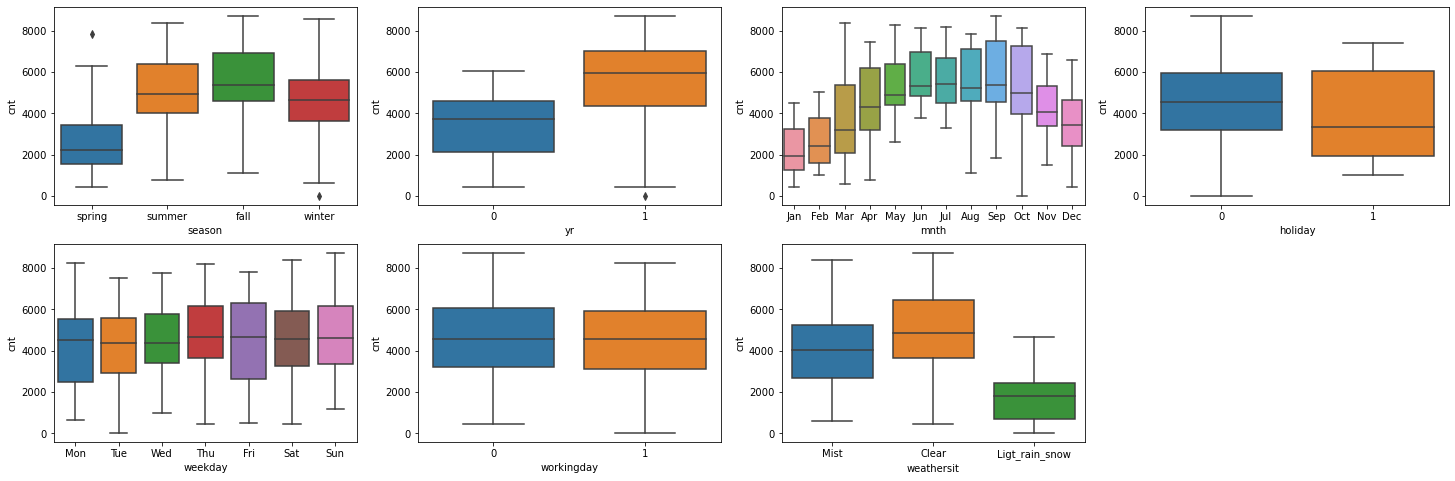

In [16]:
# Lets visualise the categorical variables with the target variable ('cnt') using boxplot
plt.figure(figsize=(25,8))
plt.subplot(2,4,1)
sns.boxplot(x='season', y='cnt', data=shared_bike)
plt.subplot(2,4,2)
sns.boxplot(x='yr', y='cnt', data=shared_bike)
plt.subplot(2,4,3)
sns.boxplot(x='mnth', y='cnt', data=shared_bike)
plt.subplot(2,4,4)
sns.boxplot(x='holiday', y='cnt', data=shared_bike)
plt.subplot(2,4,5)
sns.boxplot(x='weekday', y='cnt', data=shared_bike)
plt.subplot(2,4,6)
sns.boxplot(x='workingday', y='cnt', data=shared_bike)
plt.subplot(2,4,7)
sns.boxplot(x='weathersit', y='cnt', data=shared_bike)
plt.show()

##### Insight
1. Rental bike counts start rising from summer and it maximum demand happen in fall season.
2. The rental bike counts start rising from month of March and start dropping from month of August. But maximum demand happens in August, September and October.
3. The average of rental bike is almost same for every day of week.
4. The average of rental bike is almost same for working and non-working day.
5. The average of rental bike is more on non-holiday than on holiday, which means people may use rental bike for their office commute.
5. People prefer more bikes renting during clear and mist weather.
6. From the trend we can clearly visualise that counts of rental bikes is more in year 2019 than 2018.

- As we are not getting here year-wise variation for these categorical variables, lets add the year variable in each and check

In [17]:
def year_wise(column):
    plt.figure(figsize=(15,2))
    plt.subplot(1,2,1)
    sns.barplot(x=column, y='cnt', data=shared_bike)
    plt.subplot(1,2,2)
    sns.barplot(x=column, y='cnt', hue = 'yr', data=shared_bike)
    plt.legend(labels = ['2018', '2019'])
    plt.show()

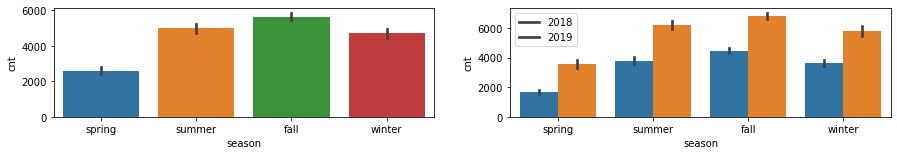

None


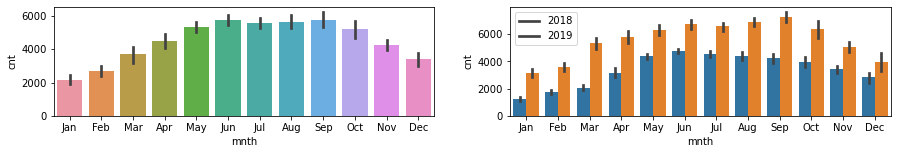

None


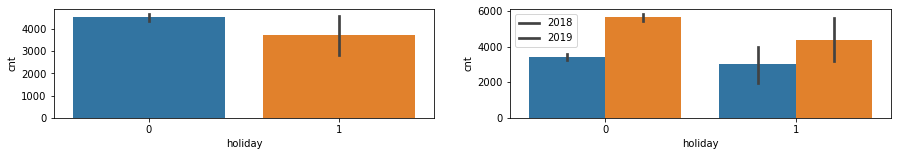

None


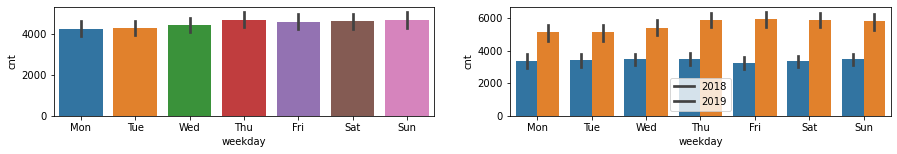

None


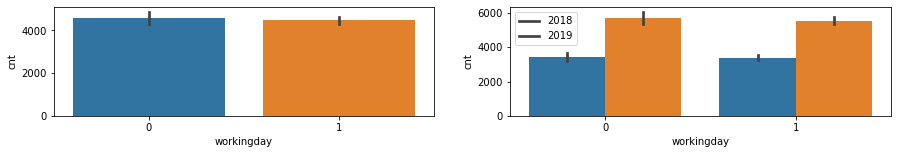

None


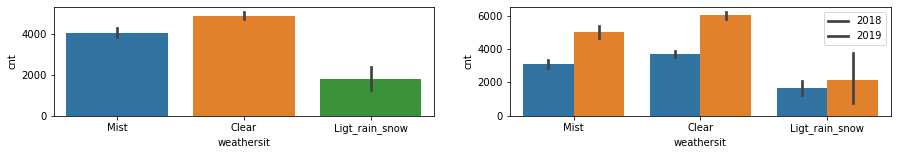

None


In [18]:
lst = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for i in lst:
    print(year_wise(i))

###### Insights 
- We can clearly visualise that bike counts with respect to each features increased in year 2019 with respect to 2018.

## Step 4: Preparing the Data for Modelling
- Encoding:
    - Converting binary vars to 1/0
    - Other categorical vars to dummy vars
- Splitting into train and test
- Rescaling of variables

###### Encoding

In [19]:
# Creating dummy variables for 'season'
season_dummy = pd.get_dummies(shared_bike['season'], drop_first=True)
season_dummy.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [20]:
#creating ummy variables for 'qrt' variable
mnth_dummy = pd.get_dummies(shared_bike['mnth'], drop_first=True)
mnth_dummy.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [21]:
# Creating dummy variables for 'weekday' variable
weekday_dummy = pd.get_dummies(shared_bike['weekday'], drop_first=True)
weekday_dummy.head()

,Mon,Sat,Sun,Thu,Tue,Wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [22]:
# Creating dummy variables for 'weathersit' variable
weather_dummy = pd.get_dummies(shared_bike['weathersit'], drop_first=True)
weather_dummy.head()

,Ligt_rain_snow,Mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [23]:
shared_bike_new = pd.concat([shared_bike, season_dummy, mnth_dummy, weekday_dummy, weather_dummy], axis=1)
shared_bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Ligt_rain_snow,Mist
0,spring,0,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,Jan,0,Tue,1,Mist,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [24]:
shared_bike_new.drop(['season', 'mnth', 'weekday', 'weathersit'], axis=1, inplace=True)
shared_bike_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Ligt_rain_snow,Mist
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
shared_bike_new.shape

(730, 30)

##### Spliting the Dataframe in train and test set

In [26]:
import sklearn
from sklearn.model_selection import train_test_split

In [27]:
df_train, df_test = train_test_split(shared_bike_new, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


##### Rescaling the features

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [29]:
# Apply scaler() to all numerical variables

# Create a list of numerical variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# fit on Data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Ligt_rain_snow,Mist
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,1,0,0,0,0,1


In [30]:
df_train[num_vars].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 5: Features Selection and Modelling

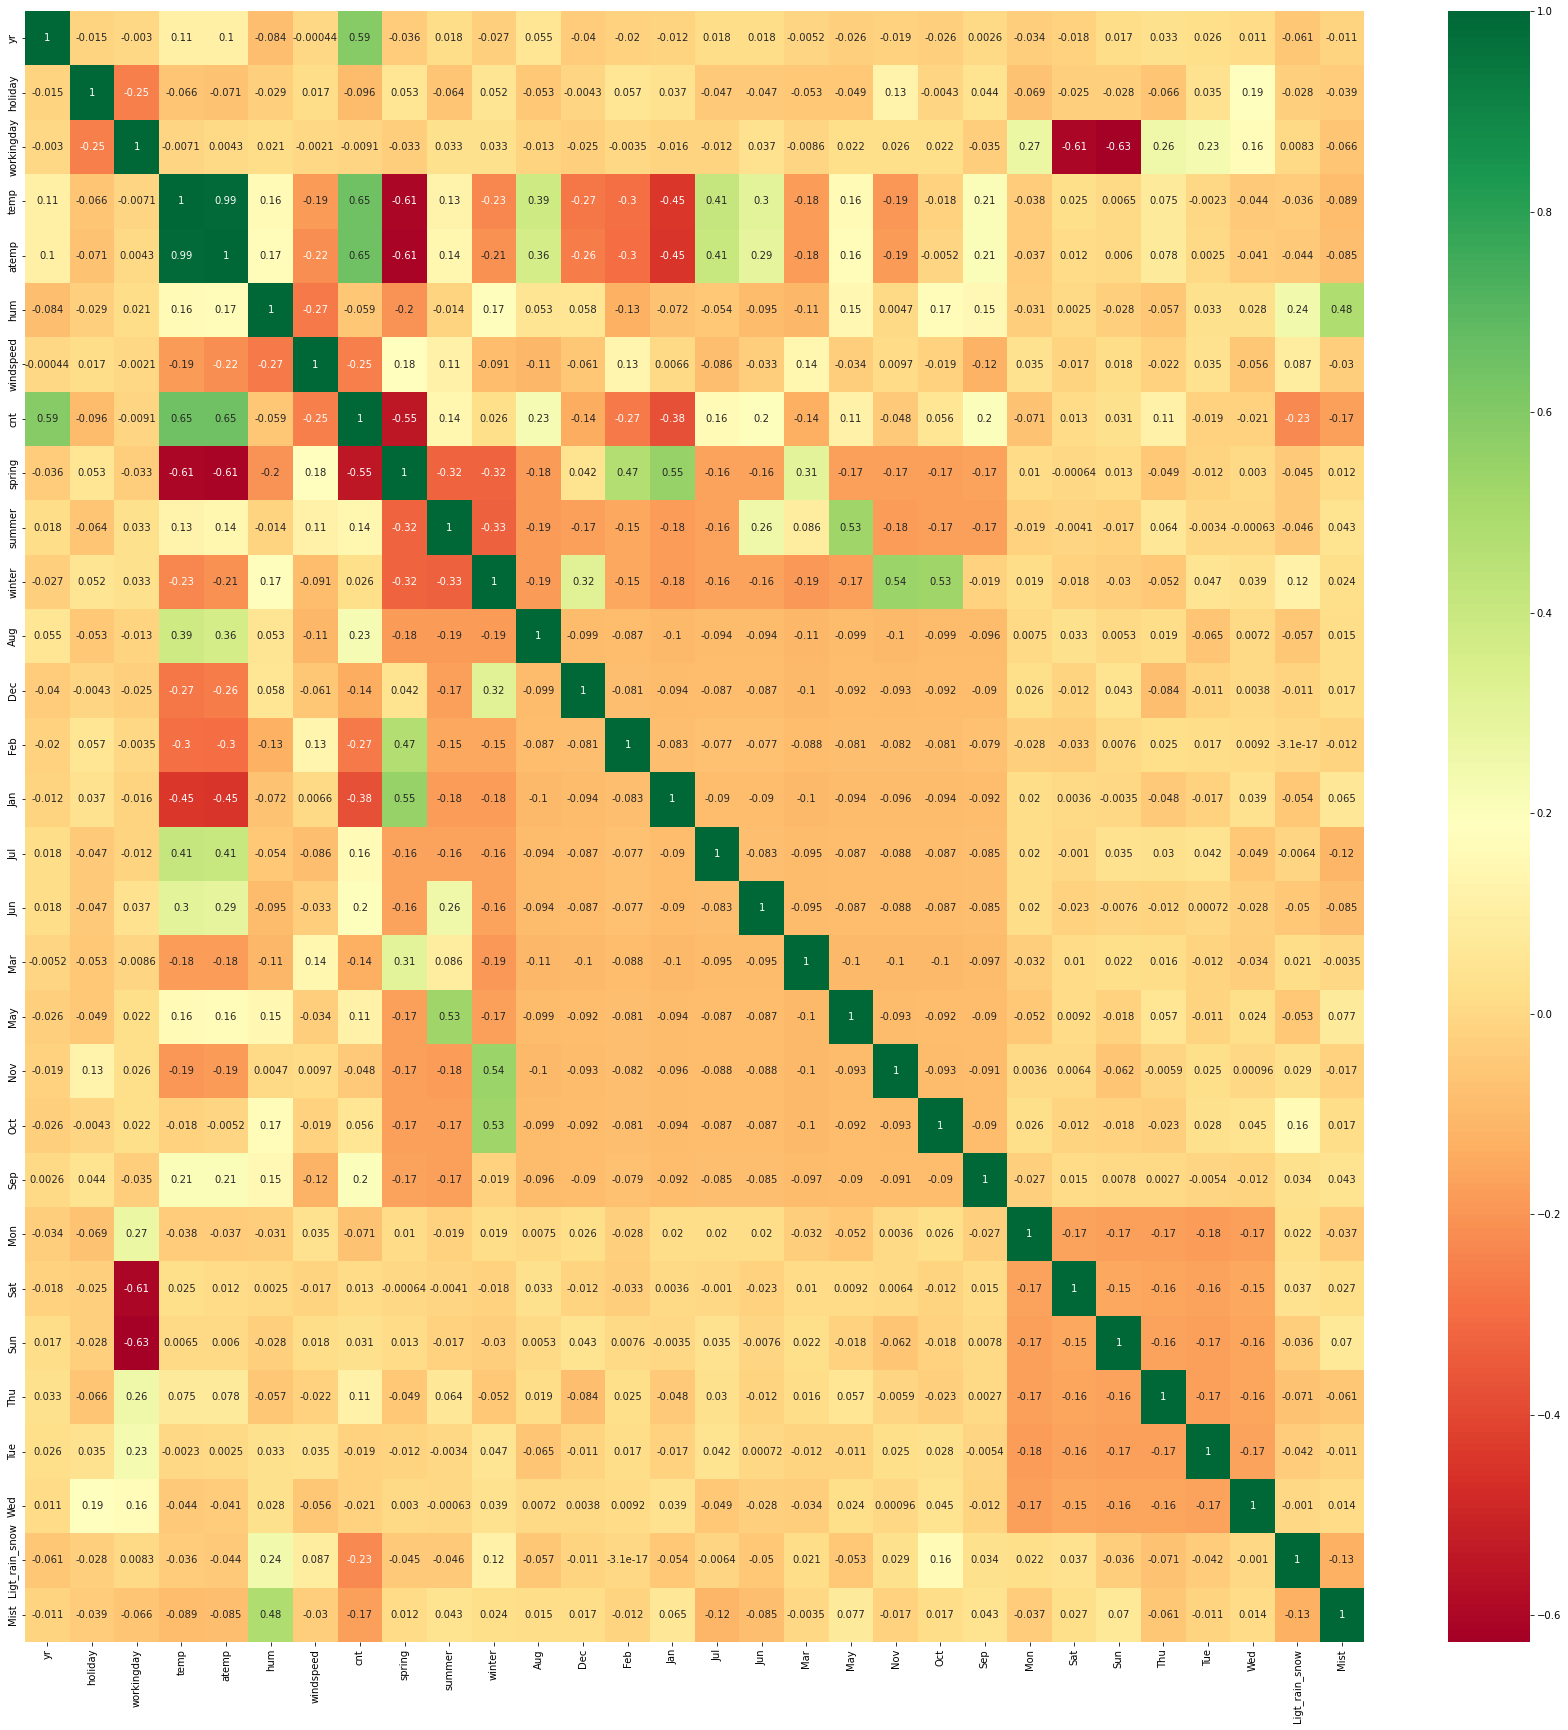

In [31]:
# heatmap
plt.figure(figsize=(30,30))
sns.heatmap(df_train.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [32]:
# x_train, y_train
y_train = df_train.pop('cnt')
X_train = df_train

In [33]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Ligt_rain_snow,Mist
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [34]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

###### Lets use RFE for features selection and statsmodels for model building

In [35]:
# Using RFE method for variable selection
# Importing RFE and LinearRegression 

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [36]:
# Running RFE with the output number of variables equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [37]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 12),
 ('Mar', False, 15),
 ('May', False, 9),
 ('Nov', True, 1),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', False, 5),
 ('Sun', False, 6),
 ('Thu', False, 14),
 ('Tue', False, 7),
 ('Wed', False, 11),
 ('Ligt_rain_snow', True, 1),
 ('Mist', True, 1)]

In [38]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'Ligt_rain_snow', 'Mist'],
      dtype='object')

In [39]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct', 'Mon',
       'Sat', 'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

###### Model 1:

In [40]:
# Creating X_train dataframe with RFE variables
X_train_rfe = X_train[col]

In [41]:
# Adding a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

In [42]:
# Create and fit the model
lm_1 = sm.OLS(y_train, X_train_lm1).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Sun, 25 Sep 2022   Prob (F-statistic):          8.15e-189
Time:                        15:16:53   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3197      0.036      8.

In [43]:
# Calculate the VIF
vif = pd.DataFrame()
vif['Feature'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values('VIF', ascending=False)
vif

,Feature,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.82
14,Mist,2.32
0,yr,2.09
11,Nov,1.85
9,Jan,1.75


- Since VIF value of 'hum' is high. So, drop this variable and check

###### Model 2:

In [44]:
X_train_rfe1 = X_train_rfe.drop('hum', axis=1)

In [45]:
# Adding a constant
X_train_lm2 = sm.add_constant(X_train_rfe1)

# Create and fit the model
lm_2 = sm.OLS(y_train, X_train_lm2).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Sun, 25 Sep 2022   Prob (F-statistic):          4.75e-186
Time:                        15:30:14   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2450      0.032      7.

In [46]:
vif = pd.DataFrame()
vif['Feature'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values('VIF', ascending=False)
vif

,Feature,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.95
4,spring,2.89
5,summer,2.24
0,yr,2.07
10,Nov,1.81
8,Jan,1.66
9,Jul,1.59
13,Mist,1.57


- We can see in VIF table that 'temp' is getting VIF>5 and 'windspeed' approx. equal to 5 but from EDA we observed that 'temp' is highly correlated with target variable ('cnt'), so let's drop 'windspeed' and check

###### Model 3:

In [52]:
X_train_rfe2 = X_train_rfe1.drop('windspeed', axis=1)

In [53]:
# Adding a constant
X_train_lm3 = sm.add_constant(X_train_rfe2)

# Create and fit the model
lm_3 = sm.OLS(y_train, X_train_lm3).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     181.6
Date:                Sun, 25 Sep 2022   Prob (F-statistic):          5.35e-179
Time:                        15:35:00   Log-Likelihood:                 485.33
No. Observations:                 510   AIC:                            -942.7
Df Residuals:                     496   BIC:                            -883.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1837      0.032      5.

In [54]:
vif = pd.DataFrame()
vif['Feature'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values('VIF', ascending=False)
vif

,Feature,VIF
2,temp,4.30
5,winter,2.81
3,spring,2.12
0,yr,2.07
4,summer,1.94
9,Nov,1.79
7,Jan,1.65
8,Jul,1.59
12,Mist,1.56
6,Dec,1.47


- p-value of 'summer' is high, let's drop it and check

###### Model 4:

In [55]:
X_train_rfe3 = X_train_rfe2.drop('summer', axis=1)

In [56]:
# Adding a constant
X_train_lm4 = sm.add_constant(X_train_rfe3)

# Create and fit the model
lm_4 = sm.OLS(y_train, X_train_lm4).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     195.8
Date:                Sun, 25 Sep 2022   Prob (F-statistic):          1.47e-179
Time:                        15:46:41   Log-Likelihood:                 483.91
No. Observations:                 510   AIC:                            -941.8
Df Residuals:                     497   BIC:                            -886.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2196      0.023      9.

In [57]:
vif = pd.DataFrame()
vif['Feature'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values('VIF', ascending=False)
vif

,Feature,VIF
2,temp,3.04
4,winter,2.53
0,yr,2.05
3,spring,1.93
8,Nov,1.79
6,Jan,1.65
11,Mist,1.53
5,Dec,1.46
7,Jul,1.34
9,Sep,1.20


- Now since all the features having p-value < 0.05 and VIF also less than 5. So this is the final model

## Step 6: Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let up plot the histogram of the error terms and see what it looks like.

In [60]:
y_train_cnt = lm_4.predict(X_train_lm4)

Text(0.5, 0, 'Errors')

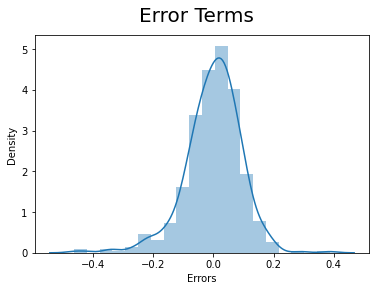

In [61]:
fig = plt.figure()
sns.distplot((y_train-y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize=10)

## Step 7: Making Predictions

###### Scaling on test set

In [62]:
# Apply scaler() to all numerical variables

# Create a list of numerical variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# fit on Data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Ligt_rain_snow,Mist
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,1,0,0,0,0,0,0


In [63]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Ligt_rain_snow,Mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test

In [64]:
y_test = df_test.pop('cnt')
X_test = df_test

In [65]:
# Now let's use the modelto make predictions.

#Creating X_test_new dataFrame by dropping variables from X_test
X_test_new = X_test[X_train_rfe3.columns]

# Adding a const variable
X_test_new = sm.add_constant(X_test_new)

In [67]:
# Making prdiction
y_pred = lm_4.predict(X_test_new)

### Model Evaluation

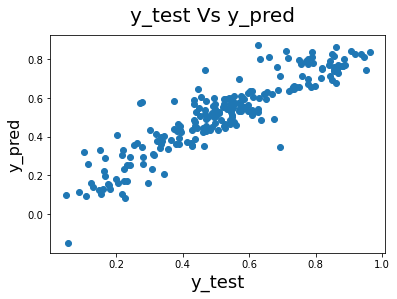

In [68]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test Vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

### R-squared value test

In [69]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.8213566850206266

### Adjusted R-squared value test

In [70]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7940900737869329

### Final Model Equation

**cnt = 0.2196 + (0.2337 x yr) - (0.0935 x holiday) + (0.4335 x temp) - (0.1084 x spring) + (0.0710 x winter) - (0.0387 x Dec) - (0.0381 x Jan) - (0.0624 x Jul) - (0.0472 x Nov) + (0.0621 x Sep) - (0.3073 x Light_rain_snow) - (0.0784 x Mist)**

Predictors are:
- yr = year of 2019
- holiday 
- temp = temp : temperature in Celsius
- spring (season)
- winter (season)
- December (month)
- January (month)
- July (month)
- November (month)
- September (month)
- Light_rain_snow (weather situation)
- Mist (weather situation)